In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

import numpy as np
import os

In [2]:
def show_grouped_plot(data, col, group_factor, n):
    data['grow'] = data.row//group_factor
    data.groupby('grow').mean()[col].iloc[:n].plot(figsize=(10,5))
    data.drop('grow', axis=1, inplace=True)
    
def plot_rolling(df, window_size, title):
    fig, ax = plt.subplots(figsize=(12, 9))
    
    ax.plot(df, data=df)
    ax.plot(df.index,df.rolling(window=window_size).mean(), label="rolling mean");
    ax.plot(df.index,df.rolling(window=window_size).std(), label="rolling std");
    ax.legend()

## Data Loading

In [3]:
root_path = '../data'

demand = pd.read_csv(os.path.join(root_path, 'Demanda_2015.csv'))
demand.columns = ['date', 'time', 'demand']
demand['datetime'] = pd.to_datetime(demand['date'].astype(str) + " " + demand['time'].astype(str),
                                    format='%d/%m/%Y %H:%M')
demand.drop(['date', 'time'], inplace=True, axis=1)
demand = demand.set_index('datetime')
demand['row'] = np.arange(demand.shape[0])


uruguay = pd.read_csv(os.path.join(root_path, 'Consumo_uruguay.csv'), sep=';')
uruguay['holiday'] = (uruguay['holiday']=='feriado').astype(int)
lbl_encoder = LabelEncoder()
uruguay['month'] = uruguay['month']
uruguay['hour'] = uruguay['hour'] -1 
uruguay['day'] = uruguay['day'].apply(lambda row: "0"+str(row) if row<10 else row)
uruguay['weekday'] = lbl_encoder.fit_transform(uruguay['weekday'])
uruguay['datetime'] = pd.to_datetime(uruguay['year'].astype(str) + "/" + uruguay['month'].astype(str) + "/" +
                                     uruguay['day'].astype(str) + " " + uruguay['hour'].astype(str)+":00",
                                    format='%Y/%b/%d %H:%M')
uruguay = uruguay.set_index('datetime')
uruguay['row'] = np.arange(uruguay.shape[0])


ozone = pd.read_csv(os.path.join(root_path, 'asomadilla.csv'))
ozone['datetime'] = pd.to_datetime(ozone['datetime'],format='%d/%m/%Y %H:%M:%S')
ozone = ozone.set_index('datetime')
ozone['row'] = np.arange(ozone.shape[0])

stocks = pd.read_csv(os.path.join(root_path, 'stocks.csv'))

In [6]:
pd.read_csv(os.path.join(root_path, 'torneo.csv')).describe()

,co,dd,no2,o3,pm10,tmp,TORNEO-VV-AT_IN
count,96408.000000,96408.000000,96408.000000,96408.000000,96408.000000,96408.000000,96408.000000
mean,503.537037,206.143965,38.631667,42.795390,28.812121,18.436684,3.941221
std,254.070733,85.011536,19.393185,25.769674,12.321114,7.948422,2.366672
min,0.000000,0.000000,0.000000,0.000000,1.000000,-3.000000,0.000000
25%,317.833300,149.000000,24.583300,20.500000,19.666700,12.666700,2.000000
50%,477.142862,201.333300,37.500000,41.000000,27.499992,18.000000,3.500000
75%,657.666700,260.270825,51.333300,61.166700,36.000000,23.500000,5.333300
max,1210.833300,360.000000,91.666700,122.166700,65.500000,39.833300,10.666700


In [7]:
pd.read_csv(os.path.join(root_path, 'aljarafe.csv')).describe()

,o3,co,pm10,no2,tmp,vv
count,96408.000000,96408.000000,96408.000000,96408.000000,96408.000000,0.0
mean,65.924948,56.270883,29.282584,33.146135,11.767657,NaN
std,434.387896,998.713491,451.200161,473.022856,145.419617,NaN
min,0.000000,5.000000,0.000000,-0.166700,0.000000,NaN
25%,39.166700,18.166700,8.166700,15.000000,3.333300,NaN
50%,61.000000,30.166700,13.666700,20.000000,6.833300,NaN
75%,84.500000,45.166700,25.166700,25.666700,13.666700,NaN
max,87715.000000,110305.000000,75852.000000,33865.000000,15415.000000,NaN


In [5]:
vh = pd.read_csv(os.path.join(root_path, 'household_power_consumption.csv'), sep=';', na_values=['?'])
vh.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


## Demand

0.0013448652815490887

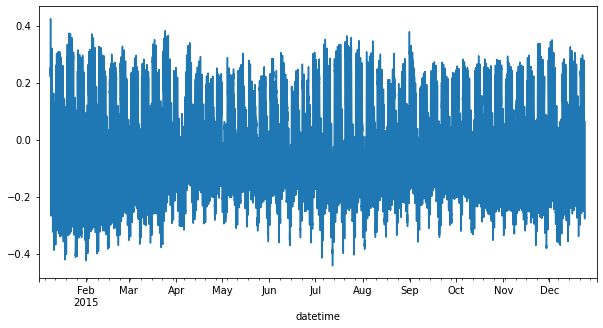

In [29]:
series = (demand.demand - demand.demand.min())/(demand.demand.max()-demand.demand.min())
result = seasonal_decompose(series, model='additive', period=6*365)
result.resid.plot(figsize=(10,5))
result.resid.mean()

 > Is the data stationary ?
Test statistic = -21.665
P-value = 0.000
Critical values :
	1%: -3.4304745641859458 - The data is  stationary with 99% confidence
	5%: -2.8615950548697553 - The data is  stationary with 95% confidence
	10%: -2.566799303876281 - The data is  stationary with 90% confidence


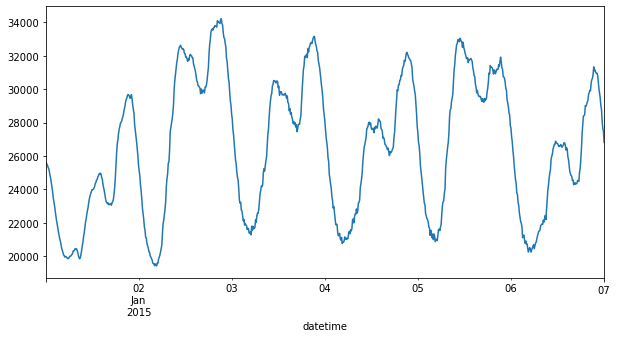

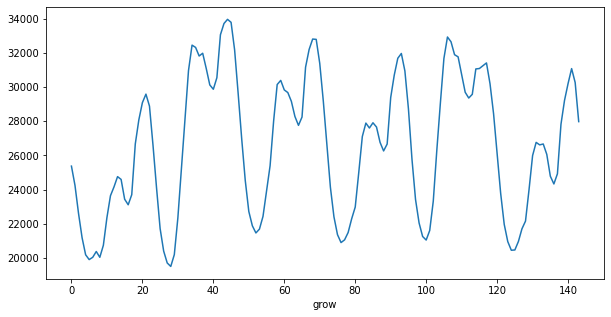

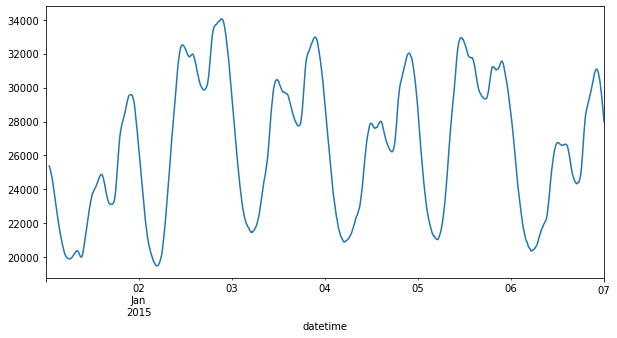

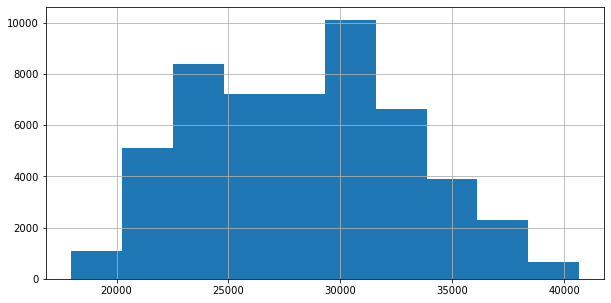

<Figure size 432x288 with 0 Axes>

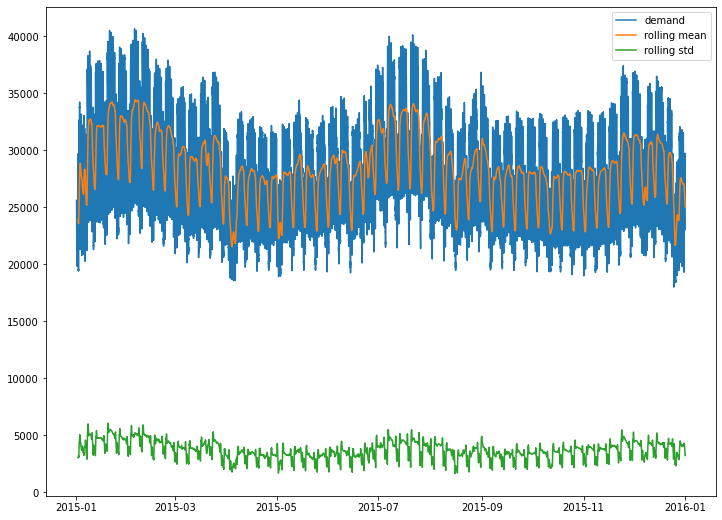

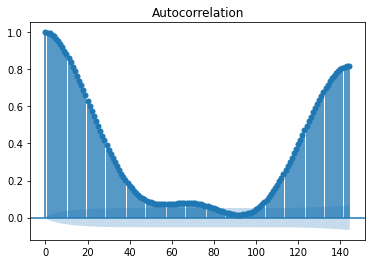

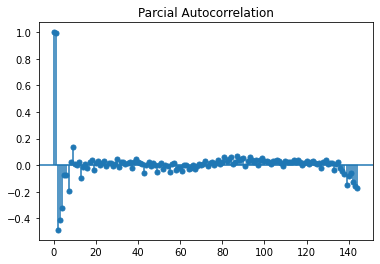

In [220]:
demand.demand.iloc[:24*6*6].plot(figsize=(10,5))
plt.figure()
show_grouped_plot(demand, 'demand', 6, 24*6)
plt.figure()
demand.demand.iloc[:24*6*6].rolling(window=6).mean().plot(figsize=(10,5))
plt.figure()
demand.demand.hist(figsize=(10,5))
plt.figure()
plot_rolling(demand.demand, 6*24, '24h roll')

print(" > Is the data stationary ?")
dftest = adfuller(demand.demand, autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

plot_acf(demand.demand,lags=6*24,title="Autocorrelation")
plt.show()

plot_pacf(demand.demand,lags=6*24,title="Parcial Autocorrelation")
plt.show()

## Uruguay

2.7261511609630473e-05

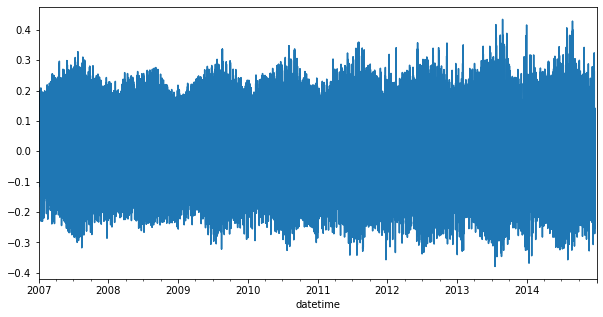

In [35]:
series = (uruguay.load - uruguay.load.min())/(uruguay.load.max()-uruguay.load.min())

result = seasonal_decompose(series, model='additive', period=365)
result.resid.plot(figsize=(10,5))
result.resid.mean()

/home/manuel/anaconda3/envs/torch-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/manuel/anaconda3/envs/torch-env/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


 > Is the data stationary ?
Test statistic = -13.605
P-value = 0.000
Critical values :
	1%: -3.4304462363257087 - The data is  stationary with 99% confidence
	5%: -2.861582534727186 - The data is  stationary with 95% confidence
	10%: -2.5667926397854015 - The data is  stationary with 90% confidence


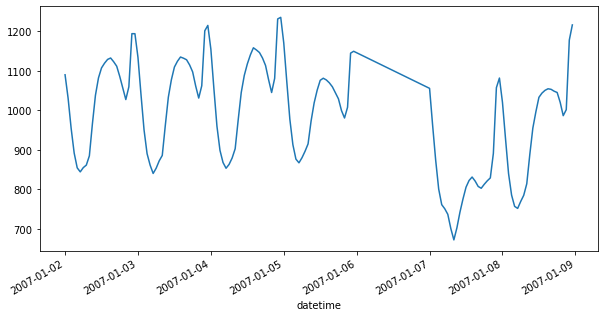

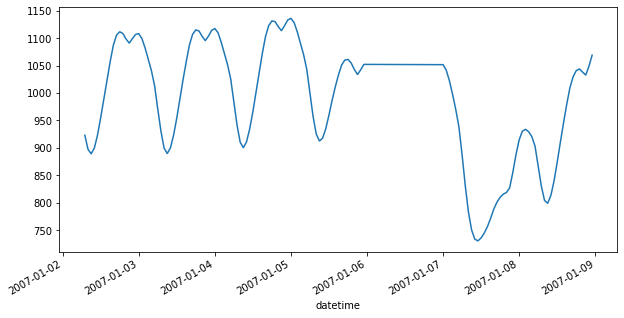

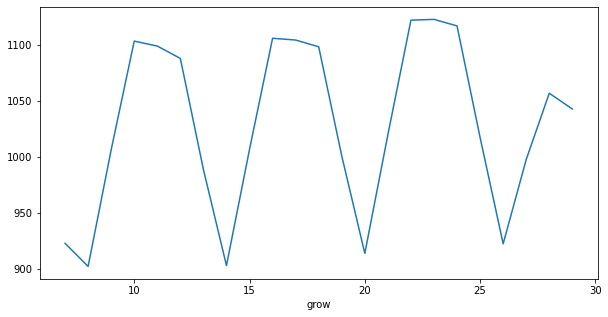

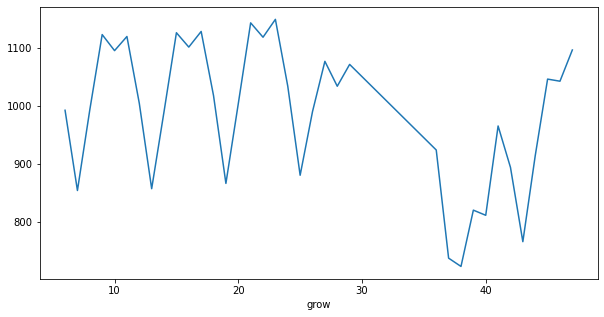

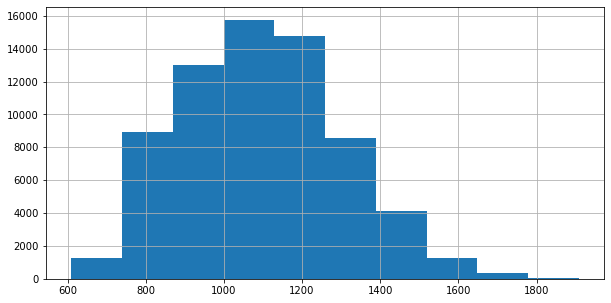

<Figure size 432x288 with 0 Axes>

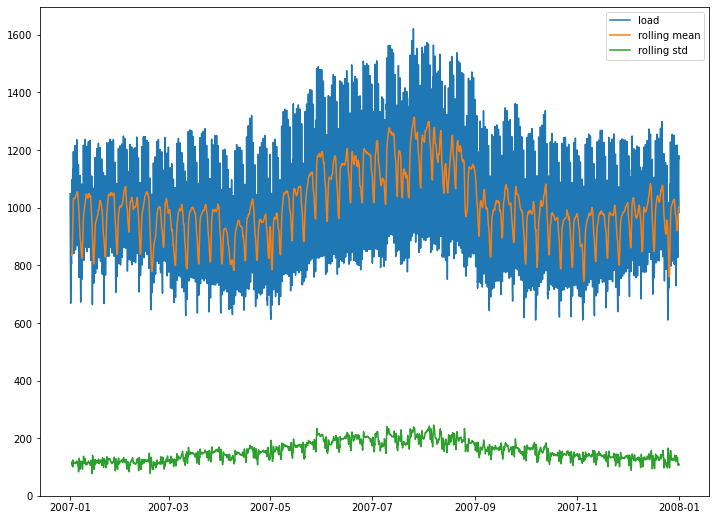

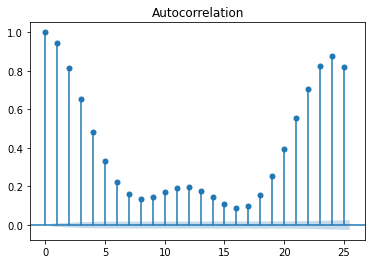

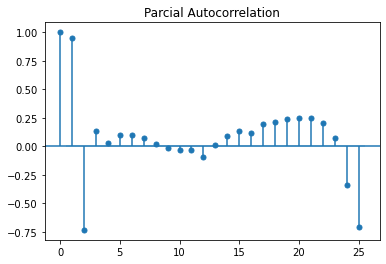

In [237]:
uruguay[uruguay.holiday==0].iloc[:24*6].load.plot(figsize=(10,5))

plt.figure()
uruguay[uruguay.holiday==0].load.iloc[:6*24].rolling(window=8).mean().plot(figsize=(10,5))
plt.figure()
uruguay['load_roll'] = uruguay[uruguay.holiday==0].load.iloc[:6*24].rolling(window=8).mean()
show_grouped_plot(uruguay, 'load_roll', 4, 6*6)
plt.figure()
show_grouped_plot(uruguay[uruguay.holiday==0], 'load', 4, 6*6)
plt.figure()
uruguay[uruguay.holiday==0].load.hist(figsize=(10,5))
plt.figure()
plot_rolling(uruguay.load.iloc[:365*24], 24, '24h roll')

print(" > Is the data stationary ?")
dftest = adfuller(uruguay[uruguay.holiday==0].load, autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

plot_acf(uruguay[uruguay.holiday==0].load,lags=25,title="Autocorrelation")
plt.show()

plot_pacf(uruguay[uruguay.holiday==0].load,lags=25,title="Parcial Autocorrelation")
plt.show()

 > Is the data stationary ?
Test statistic = -5.357
P-value = 0.000
Critical values :
	1%: -3.433488717753819 - The data is  stationary with 99% confidence
	5%: -2.862926547902014 - The data is  stationary with 95% confidence
	10%: -2.5675081335553003 - The data is  stationary with 90% confidence


/home/manuel/anaconda3/envs/torch-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/manuel/anaconda3/envs/torch-env/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


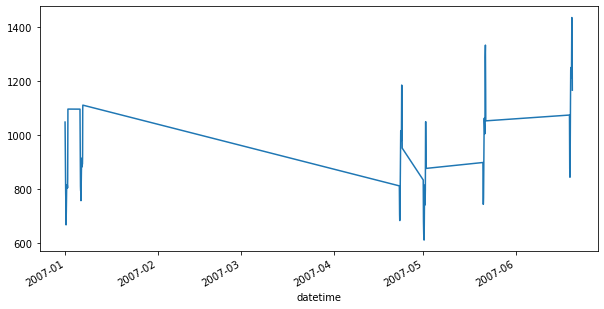

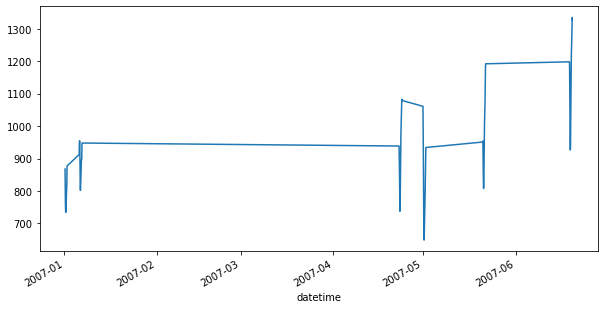

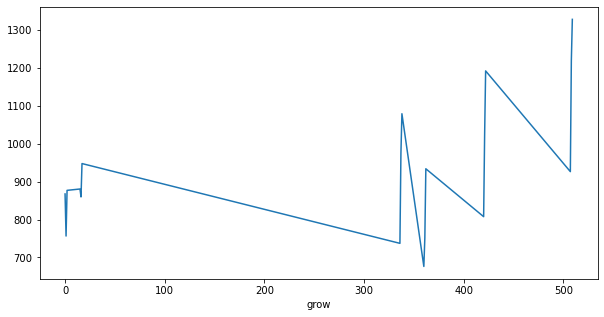

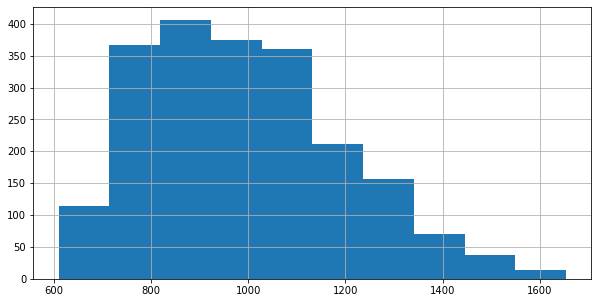

<Figure size 432x288 with 0 Axes>

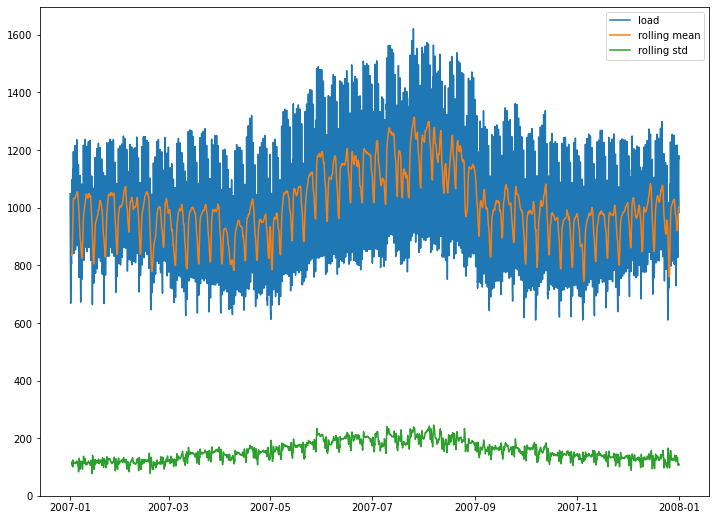

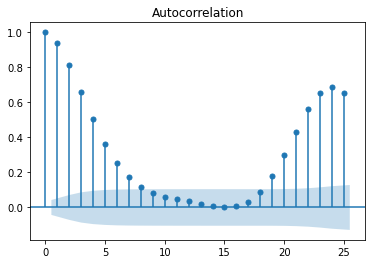

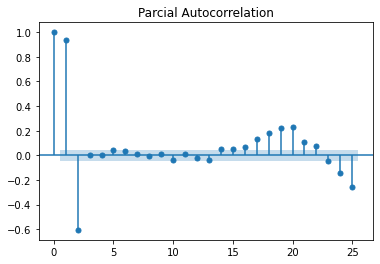

In [233]:
uruguay[uruguay.holiday==1].iloc[:24*6].load.plot(figsize=(10,5))
plt.figure()
uruguay[uruguay.holiday==1].load.iloc[:6*24].rolling(window=8).mean().plot(figsize=(10,5))
plt.figure()
show_grouped_plot(uruguay[uruguay.holiday==1], 'load', 8, 3*6)
plt.figure()
uruguay[uruguay.holiday==1].load.hist(figsize=(10,5))
plt.figure()
plot_rolling(uruguay.load.iloc[:365*24], 24, '24h roll')

print(" > Is the data stationary ?")
dftest = adfuller(uruguay[uruguay.holiday==1].load, autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

plot_acf(uruguay[uruguay.holiday==1].load,lags=25,title="Autocorrelation")
plt.show()

plot_pacf(uruguay[uruguay.holiday==1].load,lags=25,title="Parcial Autocorrelation")
plt.show()

## Ozone

-2.85508623945897e-05
-2.486555235731133e-05


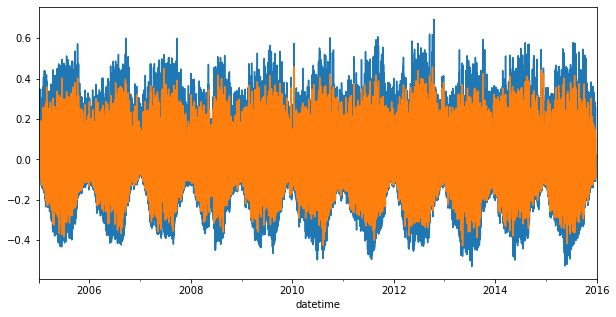

In [44]:
series = (ozone.o3 - ozone.o3.min())/(ozone.o3.max()-ozone.o3.min())
result = seasonal_decompose(series, model='additive', period=365)
result.resid.plot(figsize=(10,5))
print(result.resid.mean())

series = (ozone.o3 - ozone.o3.min())/(ozone.o3.max()-ozone.o3.min())
result = seasonal_decompose(series.rolling(window=8).mean().fillna(0), model='additive', period=365)
result.resid.plot(figsize=(10,5))
print(result.resid.mean())

4.5111580995606506e-05
4.547692809899922e-05


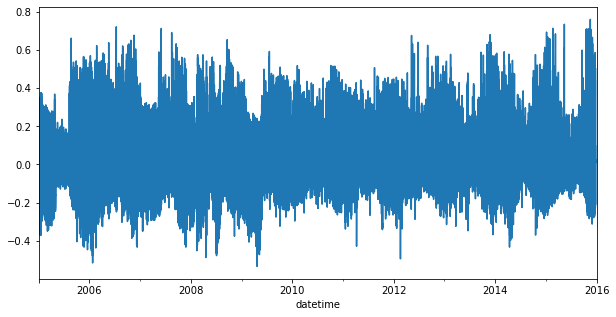

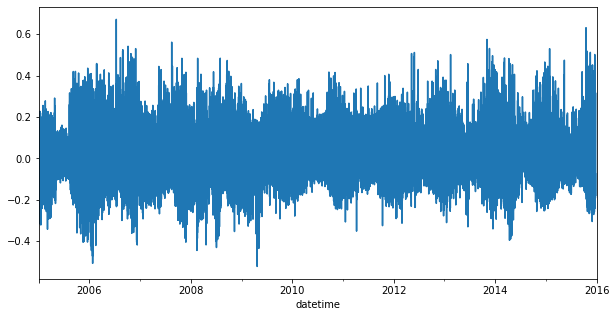

In [47]:
series = (ozone.co - ozone.co.min())/(ozone.co.max()-ozone.co.min())
result = seasonal_decompose(series, model='additive', period=365)
result.resid.plot(figsize=(10,5))
print(result.resid.mean())
plt.figure()
series = (ozone.co - ozone.co.min())/(ozone.co.max()-ozone.co.min())
result = seasonal_decompose(series.rolling(window=4).mean().fillna(0), model='additive', period=365)
result.resid.plot(figsize=(10,5))
print(result.resid.mean())

5.108805007209337e-05

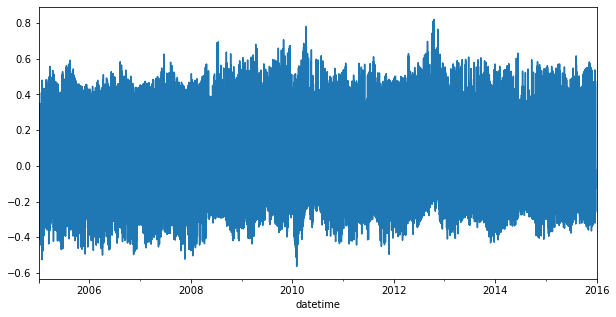

In [38]:
series = (ozone.no2 - ozone.no2.min())/(ozone.no2.max()-ozone.no2.min())
result = seasonal_decompose(series, model='additive', period=365)
result.resid.plot(figsize=(10,5))
result.resid.mean()

<AxesSubplot:xlabel='datetime'>

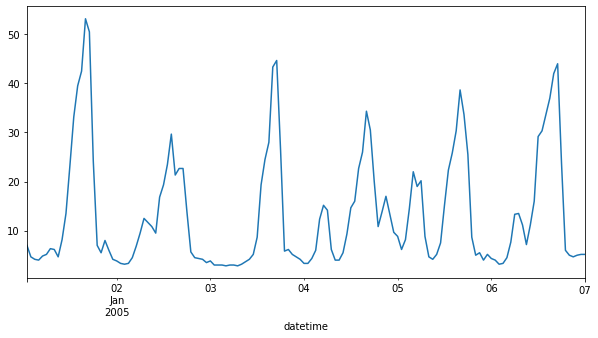

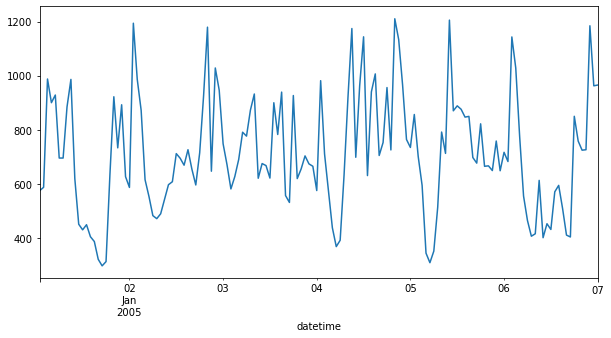

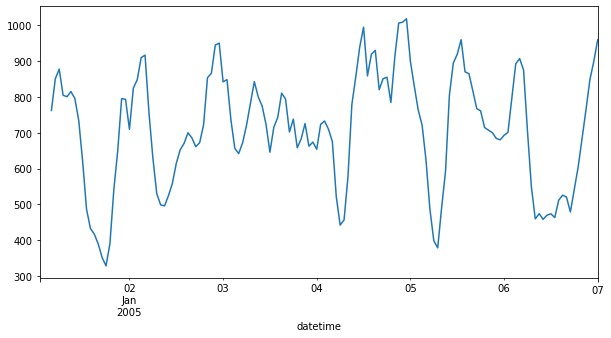

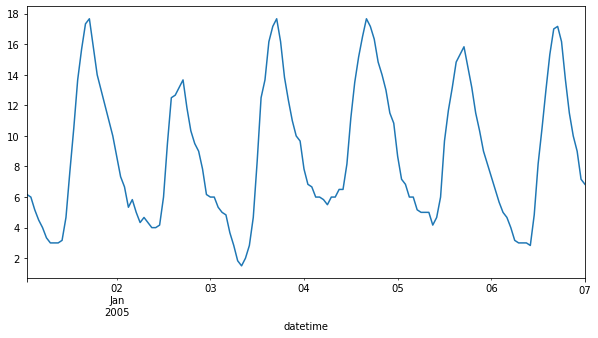

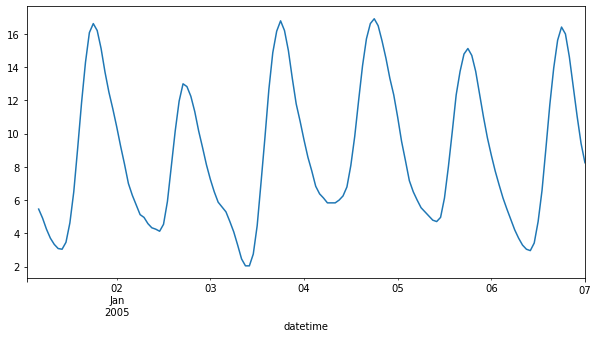

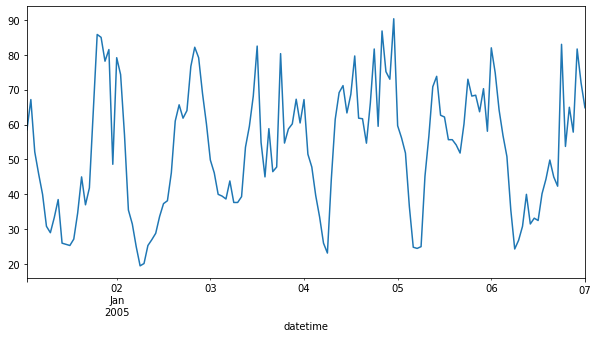

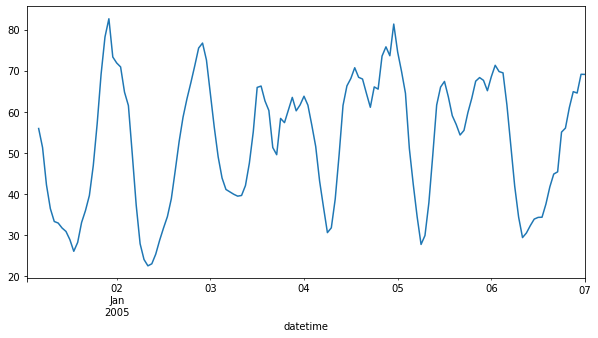

In [15]:
ozone.o3.iloc[:6*24].rolling(window=1).mean().plot(figsize=(10,5))
plt.figure()
ozone.co.iloc[:6*24].rolling(window=1).mean().plot(figsize=(10,5))
plt.figure()
ozone.co.iloc[:6*24].rolling(window=4).mean().plot(figsize=(10,5))
plt.figure()
ozone.tmp.iloc[:6*24].rolling(window=1).mean().plot(figsize=(10,5))
plt.figure()
ozone.tmp.iloc[:6*24].rolling(window=4).mean().plot(figsize=(10,5))
plt.figure()
ozone.no2.iloc[:6*24].rolling(window=1).mean().plot(figsize=(10,5))
plt.figure()
ozone.no2.iloc[:6*24].rolling(window=4).mean().plot(figsize=(10,5))

<AxesSubplot:xlabel='datetime'>

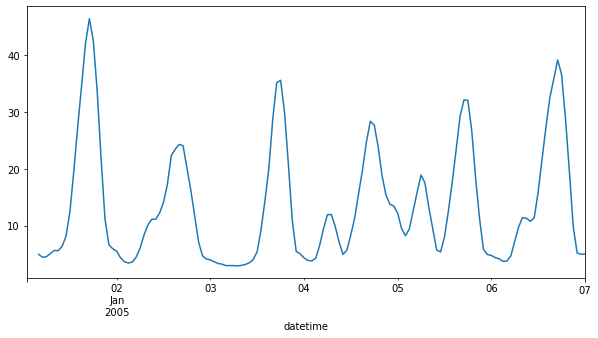

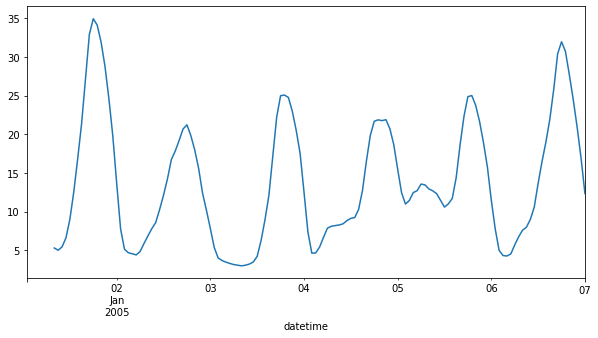

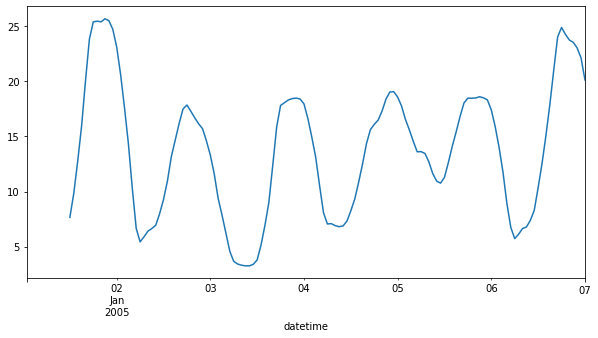

In [236]:
ozone.o3.iloc[:6*24].rolling(window=4).mean().plot(figsize=(10,5))
plt.figure()
ozone.o3.iloc[:6*24].rolling(window=8).mean().plot(figsize=(10,5))
plt.figure()
ozone.o3.iloc[:6*24].rolling(window=12).mean().plot(figsize=(10,5))

 > Is the data stationary ?
Test statistic = -12.744
P-value = 0.000
Critical values :
	1%: -3.4304178791181816 - The data is  stationary with 99% confidence
	5%: -2.8615700014942167 - The data is  stationary with 95% confidence
	10%: -2.566785968747739 - The data is  stationary with 90% confidence


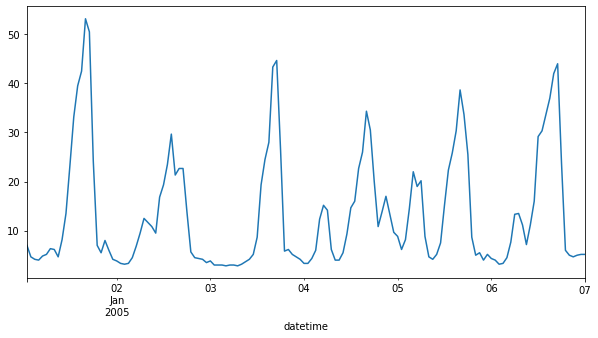

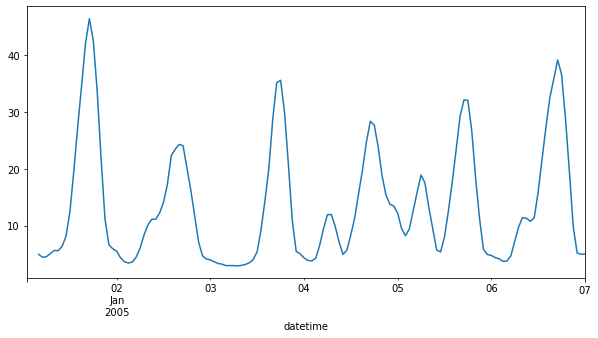

<Figure size 432x288 with 0 Axes>

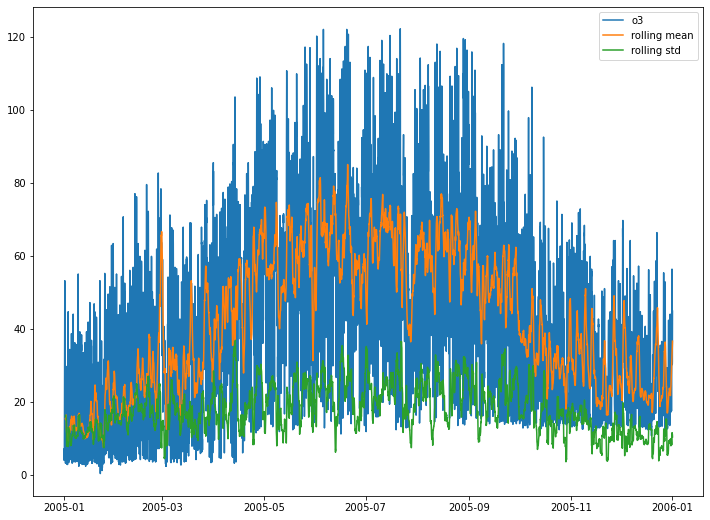

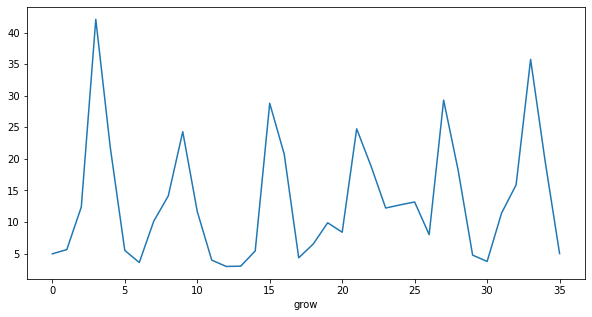

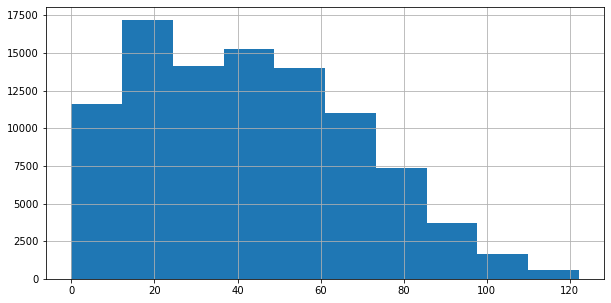

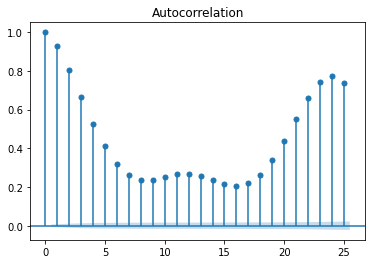

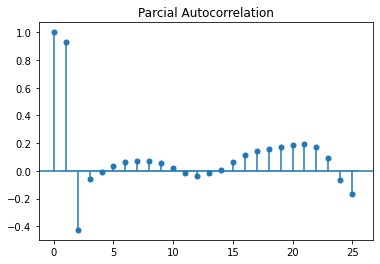

In [235]:
ozone.iloc[:24*6].o3.plot(figsize=(10,5))
plt.figure()
ozone.o3.iloc[:6*24].rolling(window=4).mean().plot(figsize=(10,5))
plt.figure()
plot_rolling(ozone.o3.iloc[:365*24], 24, '24h roll')
plt.figure()
show_grouped_plot(ozone, 'o3', 4, 6*6)
plt.figure()
ozone.o3.hist(figsize=(10,5))

print(" > Is the data stationary ?")
dftest = adfuller(ozone.o3, autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))
    
plot_acf(ozone.o3,lags=25,title="Autocorrelation")
plt.show()

plot_pacf(ozone.o3,lags=25,title="Parcial Autocorrelation")
plt.show()